In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

rows_to_keep = [5,6]

model = pd.read_csv('Test-1\Test 1 - Salmingo\Test 1 Salmingo - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)
ct_S = pd.read_csv('Test-1\Test 1 - Salmingo\Test 1 Salmingo - Contact Tracing.csv', skiprows = 21, usecols=[0,1,4,5,8,9,12,13,16,17,20,21])
dc_S = pd.read_csv('Test-1\Test 1 - Salmingo\Test 1 Salmingo - Daily Chart.csv', skiprows = 19)
dd_S = pd.read_csv('Test-1\Test 1 - Salmingo\Test 1 Salmingo - Daily Deaths.csv', skiprows = 17)
dtc_S = pd.read_csv('Test-1\Test 1 - Salmingo\Test 1 Salmingo - Daily Total Cases.csv', skiprows = 16)
dtr_S = pd.read_csv('Test-1\Test 1 - Salmingo\Test 1 Salmingo - Daily Total Recoveries.csv', skiprows = 16)
sod_S = pd.read_csv('Test-1\Test 1 - Salmingo\Test 1 Salmingo - Spread of Disease.csv', skiprows = 16)

ct_G = pd.read_csv('Test-1\Test 1 - Galvez\Test 1 Galvez - Contact Tracing.csv', skiprows = 21, usecols=[0,1,4,5,8,9,12,13,16,17,20,21])
dc_G = pd.read_csv('Test-1\Test 1 - Galvez\Test 1 Galvez - Daily Chart.csv', skiprows = 19)
dd_G = pd.read_csv('Test-1\Test 1 - Galvez\Test 1 Galvez - Daily Deaths.csv', skiprows = 17)
dtc_G = pd.read_csv('Test-1\Test 1 - Galvez\Test 1 Galvez - Daily total cases.csv', skiprows = 16)
dtr_G = pd.read_csv('Test-1\Test 1 - Galvez\Test 1 Galvez - Daily total recoveries.csv', skiprows = 16)
sod_G = pd.read_csv('Test-1\Test 1 - Galvez\Test 1 Galvez - Spread of Disease.csv', skiprows = 16)



In [2]:
model

,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,vax-type,total-population,grocery-area,comorbidity-count,base-infection-risk,...,maximum-days,curfew-hours,workplace-area,tick-represents,starting-vax-count,healthcare-worker-count,starting-infected,mask-wear-percent,senior-count,quarantine-level
0,3000,80,1500,4500,220,"""mRNA""",938,3000,40,0.006,...,0,0,4500,"""3 Minutes""",500,110,50,90,40,"""GCQ"""


Test 1 was running under V2.1 with these paramaters

# Spread of Disease in Ticks

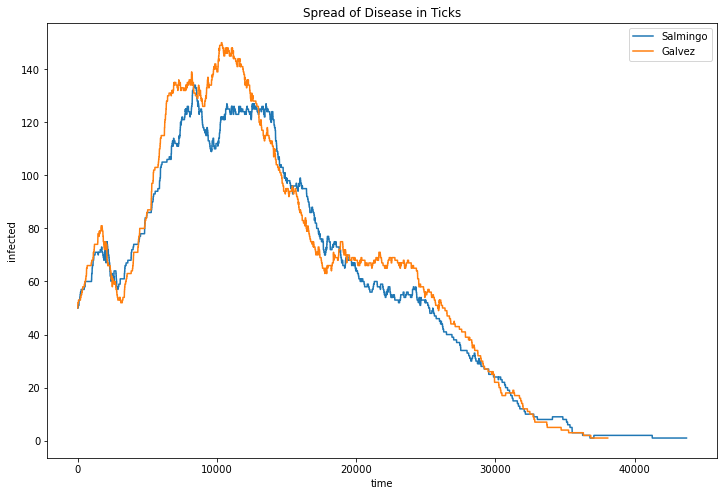

In [3]:
plt.figure(figsize=(12,8))
plt.plot(sod_S.x, sod_S.y)
plt.plot(sod_G.x, sod_G.y)
plt.legend(['Salmingo', 'Galvez'])
plt.title('Spread of Disease in Ticks')
plt.xlabel('time')
plt.ylabel('infected')
plt.show()

## Convert Ticks to Days in Spread of Disease

Convert Ticks to Days in Spread of Disease
1 tick = 3 mins 
480 ticks = 1 day

source(https://stackoverflow.com/questions/47239332/take-the-sum-of-every-n-rows-in-a-pandas-series)

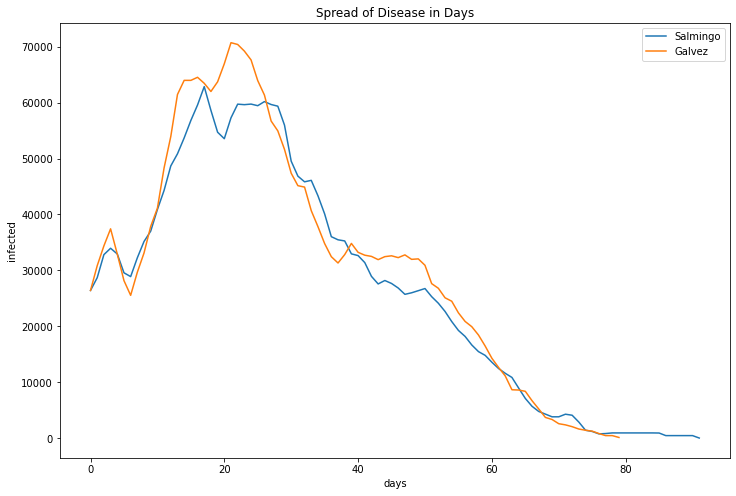

In [34]:
sodSdays = sod_S.groupby(sod_S.index // 480).sum()
sodGdays = sod_G.groupby(sod_G.index // 480).sum()

plt.figure(figsize=(12,8))
plt.plot(sodSdays.y)
plt.plot(sodGdays.y)
plt.title('Spread of Disease in Days')
plt.legend(['Salmingo', 'Galvez'])
plt.xlabel('days')
plt.ylabel('infected')
plt.show()

# Daily Total Recoveries

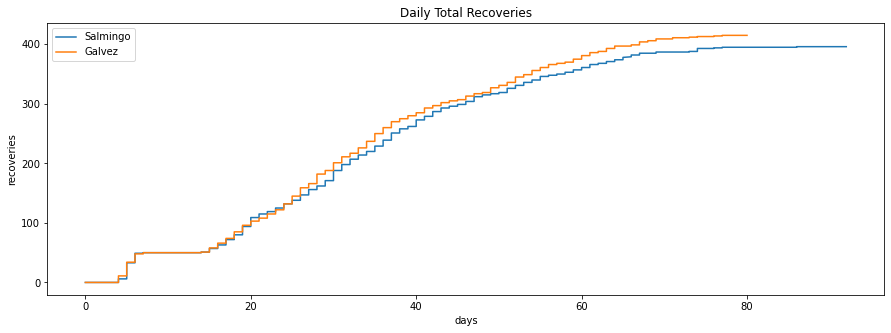

In [35]:
plt.figure(figsize=(15,5))
plt.plot(dtr_S.x, dtr_S.y)
plt.plot(dtr_G.x, dtr_G.y)
plt.title('Daily Total Recoveries')
plt.legend(['Salmingo', 'Galvez'])
plt.xlabel('days')
plt.ylabel('recoveries')
plt.show()

# Contact Tracing

In [52]:
ct_S.columns=['x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5']
ct_G.columns=['x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5']

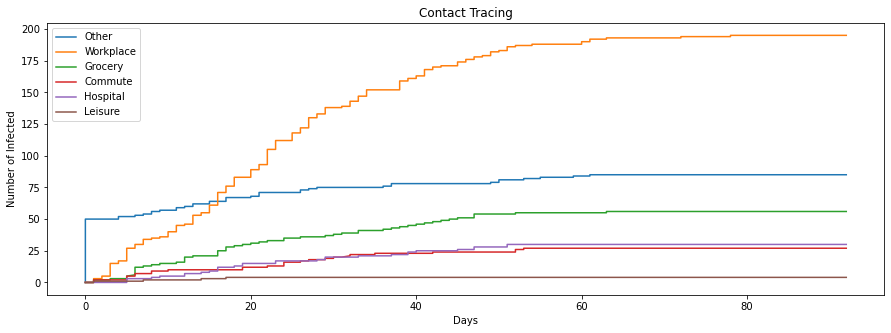

In [39]:
plt.figure(figsize=(15,5))
plt.plot(ct_S.x, ct_S.y)
plt.plot(ct_S.x1, ct_S.y1)
plt.plot(ct_S.x2, ct_S.y2)
plt.plot(ct_S.x3, ct_S.y3)
plt.plot(ct_S.x4, ct_S.y4)
plt.plot(ct_S.x5, ct_S.y5)
plt.title('Contact Tracing')
plt.legend(['Other', 'Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure'])
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.show()


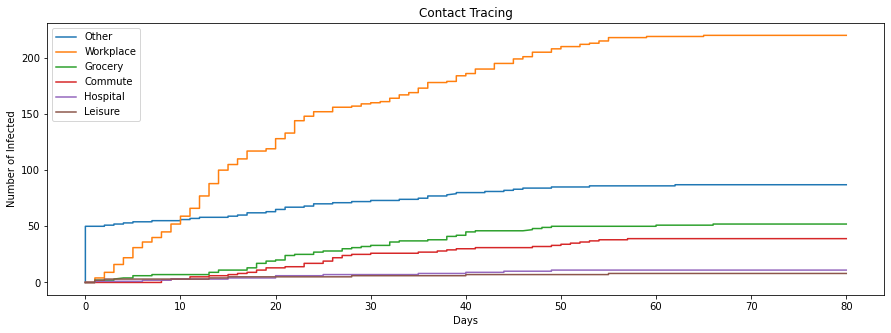

In [43]:
plt.figure(figsize=(15,5))
plt.plot(ct_G.x, ct_G.y)
plt.plot(ct_G.x1, ct_G.y1)
plt.plot(ct_G.x2, ct_G.y2)
plt.plot(ct_G.x3, ct_G.y3)
plt.plot(ct_G.x4, ct_G.y4)
plt.plot(ct_G.x5, ct_G.y5)
plt.title('Contact Tracing')
plt.legend(['Other', 'Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure'])
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.show()